# 44. 係り受け木の可視化Permalink
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

In [2]:
import CaboCha

class Morph:
    def __init__(self, dc):
        self.surface = dc['surface']
        self.base = dc['base']
        self.pos = dc['pos']
        self.pos1 = dc['pos1']


class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []

    def appendSrc(self, src):
        self.srcs = src


def parse(block):
    tmp, srcs, res = {'morphs':[], 'dst':-1}, {}, []
    block = [b for b in block.split('\n') if b != ''] + ['']
    for b in block:
        if b == '':
            res.append(Chunk(tmp['morphs'], tmp['dst']))
            ln = len(res)
            for i in range(ln):
                if str(i) in srcs:
                    res[i].appendSrc(srcs[str(i)])
            return res
        elif b[0] == '*':
            if tmp['morphs'] != []:
                res.append(Chunk(tmp['morphs'], tmp['dst']))
            tmp = {'morphs':[], 'dst':-1}
            lst = b.split('D')[0].split(' ')
            tmp['dst'], now = lst[2], lst[1]
            if now != '-1':
                if tmp['dst'] in srcs:
                    srcs[tmp['dst']].append(now)
                else:
                    srcs[tmp['dst']] = [now]
        else:
            (surface, attr, _) = b.split('\t')
            attr = attr.split(',')
            lineDict = {
                'surface': surface,
                'base': attr[6],
                'pos': attr[0],
                'pos1': attr[1]
            }
            tmp['morphs'].append(Morph(lineDict))


filename = '../data/tmp.cabocha'
with open(filename, mode='r', encoding='utf-8') as f:
    blockList = f.read().split('EOS')
ans = [parse(b) for b in blockList]

In [13]:
import pydot
from IPython.display import Image, display_png

In [7]:
pairs = []
for block in ans[7]:
    pre = ''.join([b.surface for b in block.morphs])
    post = ''.join([b.surface for b in ans[7][int(block.dst)].morphs])
    pre = pre.replace('。', '').replace('、', '')
    post = post.replace('。', '').replace('、', '')
    pairs.append([pre, post])
print(pairs)

[['しかし', '思わなかった'], ['その', '当時は'], ['当時は', '何という'], ['何という', '考も'], ['考も', 'なかったから'], ['なかったから', '思わなかった'], ['別段', '恐し'], ['恐し', '思わなかった'], ['いとも', '思わなかった'], ['思わなかった', '思わなかった']]


In [12]:
g = pydot.graph_from_edges(pairs)
g.write_png('../data/ch05_44.png', prog='dot')

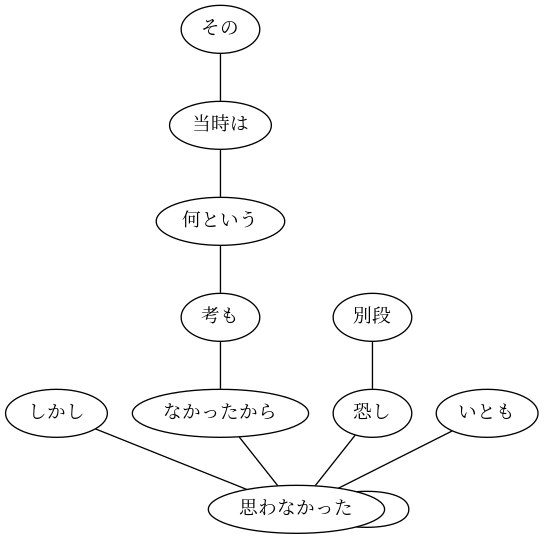

In [14]:
import pathlib
f = pathlib.Path('../data/ch05_44.png')
display_png(Image(str(f)))